In [123]:
!pip install plotly pandas

In [124]:
!pip install -U kaleido

In [125]:
!pip install pulp

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt


from IPython.display import Image

import kaleido

import pulp

In [127]:
df = pd.read_csv('https://raw.githubusercontent.com/MananMishra-7/INSE6210/main/supply_chain_data.csv')
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [128]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [129]:
df.shape

(100, 24)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [131]:
df.duplicated().any() # no duplicates

np.False_

In [132]:

df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [133]:
df = df.rename(columns={'Lead times': 'Business lead time', 'Lead time':'Supplier lead time', 'Costs': 'Transportation costs'})
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Business lead time', 'Order quantities',
       'Shipping times', 'Shipping carriers', 'Shipping costs',
       'Supplier name', 'Location', 'Supplier lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Routes',
       'Transportation costs'],
      dtype='object')

In [134]:
data=df

In [135]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Business lead time,Order quantities,...,Location,Supplier lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Transportation costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [136]:
data.isnull().any()

,0
Product type,False
SKU,False
Price,False
Availability,False
Number of products sold,False
Revenue generated,False
Customer demographics,False
Stock levels,False
Business lead time,False
Order quantities,False


In [137]:
selected_columns = ['Price', 'Number of products sold', 'Revenue generated', 'Stock levels',
                    'Shipping costs', 'Manufacturing costs', 'Defect rates']


In [138]:

categorical_variables = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']
frequency_distribution = {}

for col in categorical_variables:
    frequency_distribution[col] = df[col].value_counts()

print("\nFrequency Distribution for Categorical Variables:")
for col, freq_dist in frequency_distribution.items():
    print(f"\n{col}:")
    print(freq_dist)


Frequency Distribution for Categorical Variables:

Product type:
Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

Customer demographics:
Customer demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

Shipping carriers:
Shipping carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64

Supplier name:
Supplier name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

Location:
Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

Inspection results:
Inspection results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

Transportation modes:
Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

Routes:
Routes
Route A    43
Route B    37
Route C    20
Name: count, dtype: int64


<ipython-input-139-2b1f2b45f5ef>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-139-2b1f2b45f5ef>:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-139-2b1f2b45f5ef>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-139-2b1f2b45f5ef>:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-139-2b1f2b45f5ef>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




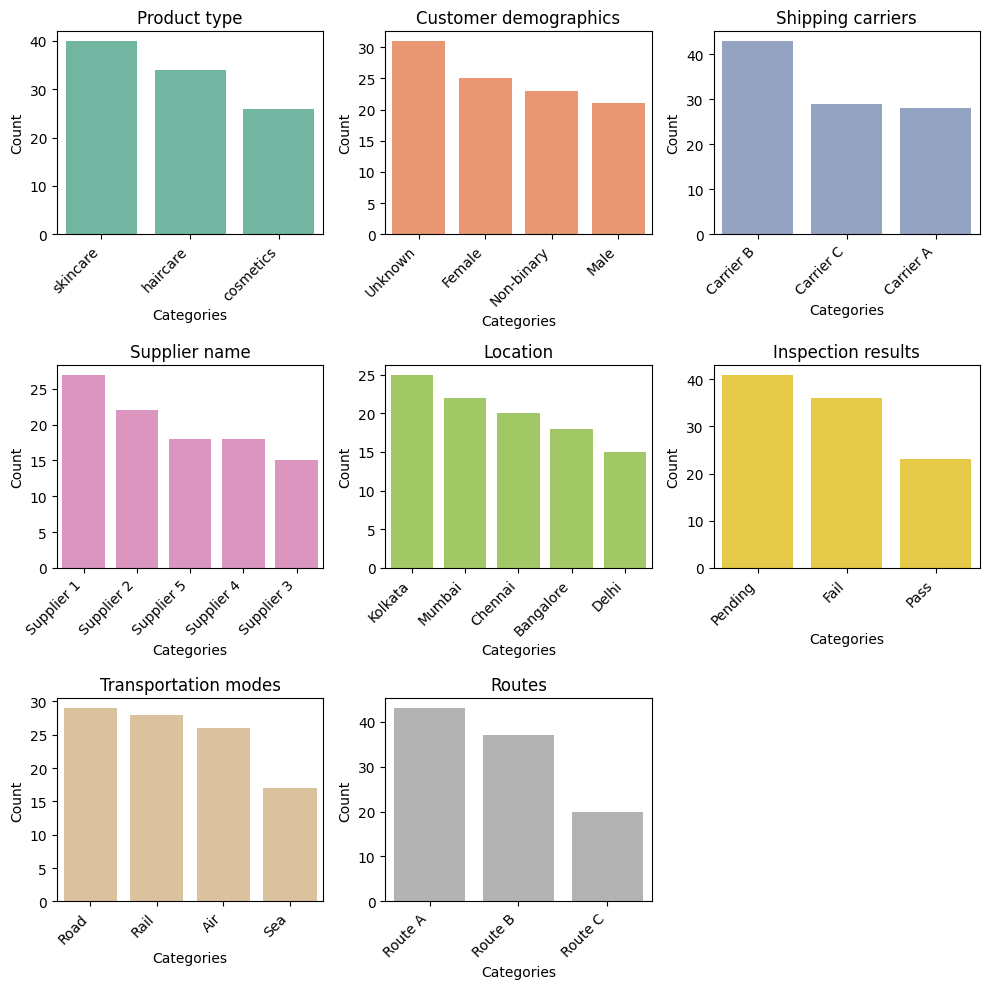

In [139]:


num_plots = len(categorical_variables)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axes = axes.flatten()

# Choose a color palette (e.g., tab10, Set2, pastel, etc.)
palettes = sns.color_palette("Set2", num_plots)

for i, col in enumerate(categorical_variables):
    if col in frequency_distribution:
        freq_dist = frequency_distribution[col]
        ax = axes[i]
        sns.barplot(
            x=freq_dist.index,
            y=freq_dist.values,
            ax=ax,
            palette=sns.color_palette([palettes[i]] * len(freq_dist))  # assign same color to all bars in a plot
        )
        ax.set_title(col)
        ax.set_xlabel("Categories")
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove unused axes
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


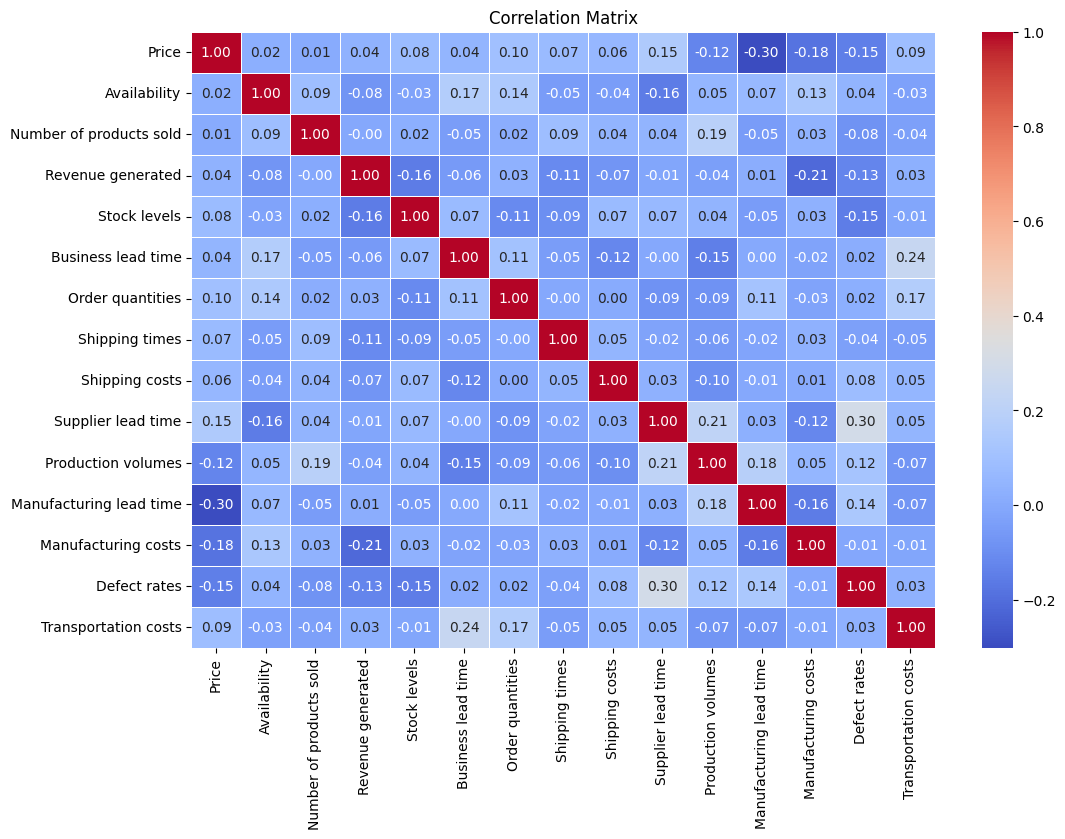

In [140]:

numerical_variables = ['Price', 'Availability', 'Number of products sold',
                       'Revenue generated', 'Stock levels', 'Business lead time', 'Order quantities', 'Shipping times',
                       'Shipping costs', 'Supplier lead time', 'Production volumes', 'Manufacturing lead time',
                       'Manufacturing costs',
                       'Defect rates', 'Transportation costs']
correlation_matrix = df[numerical_variables].corr(method='pearson')


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [141]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [142]:
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.45,
                  color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside',textinfo='percent')
pie_chart.show()

In [143]:
trans_data = data.groupby('Transportation modes')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(trans_data,values='Number of products sold', names='Transportation modes',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.5,

                  )
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

In [144]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total revenue by shipping carrier',
                 xaxis_title='Shipping carrier',
                 yaxis_title='Revenue Generated')
fig.show()

In [145]:
total_revenue = data.groupby('Location')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Location'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Locations',
                 yaxis_title='Revenue generated')
fig

In [146]:
total_revenue = data.groupby('Transportation modes')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Transportation modes'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Transportation modes',
                 yaxis_title='Revenue generated')
fig

In [147]:
avg_lead_time = data.groupby('Product type')['Supplier lead time'].mean().reset_index()
avg_manufacturing_time = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time,avg_manufacturing_time, on ='Product type')
result.rename(columns={'Lead time':'Avg lead time','Manufacturing time':'Avg manufacturing time'}, inplace=True)
result

,Product type,Supplier lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


In [148]:
shipping_cost_chart = px.bar(data,x='Shipping carriers',
                            y='Shipping costs',
                            title='Shipping Costs by Carrier')
shipping_cost_chart.show()

In [149]:
transportation_chart = px.pie(data,
                             values='Transportation costs',
                             names='Transportation modes',
                             title='Cost Distribution by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.update_traces(textposition='inside',textinfo='percent+label')
transportation_chart

In [150]:
trans = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()

trans_chart = px.pie(trans,values='Defect rates',
                    names='Transportation modes',
                    title='Defect Rates by Transportation Mode',
                    hole=0.5,
                    color_discrete_sequence=px.colors.qualitative.Pastel)
trans_chart.update_traces(textposition='inside',textinfo='label+percent')
trans_chart

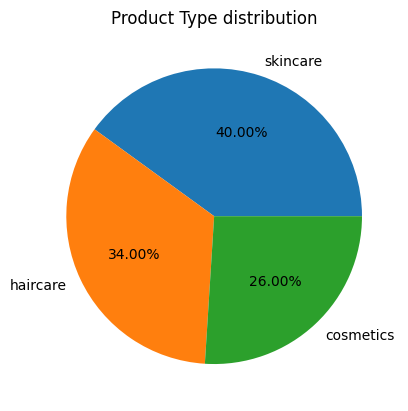

In [151]:
pie_labels = data['Product type'].value_counts().index.to_list()
plt.pie(data['Product type'].value_counts(), autopct="%.2f%%", labels = pie_labels);
plt.title ("Product Type distribution");

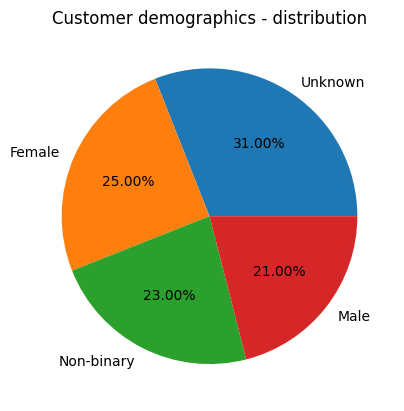

In [152]:

gender_labels = data['Customer demographics'].value_counts().index.to_list()
plt.pie(data['Customer demographics'].value_counts(), labels=gender_labels, autopct="%.2f%%");
plt.title("Customer demographics - distribution");

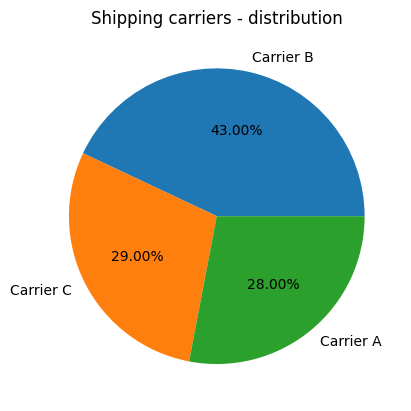

In [153]:

carrier_labels = data['Shipping carriers'].value_counts().index.to_list()
plt.pie(data['Shipping carriers'].value_counts(), labels=carrier_labels, autopct="%.2f%%");
plt.title('Shipping carriers - distribution');

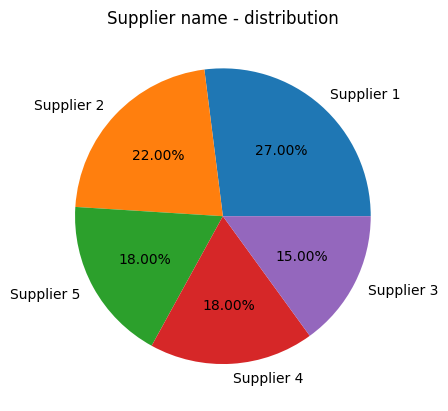

In [154]:
supplier_labels = data['Supplier name'].value_counts().index.to_list();
plt.pie(data['Supplier name'].value_counts(), labels=supplier_labels, autopct="%.2f%%");
plt.title('Supplier name - distribution');

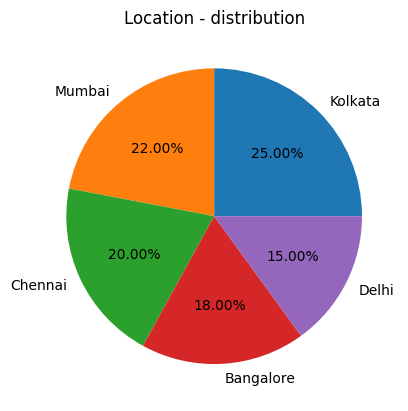

In [155]:
location_labels = data['Location'].value_counts().index.to_list()
plt.pie(data['Location'].value_counts(), labels=location_labels, autopct="%.2f%%");
plt.title ("Location - distribution");

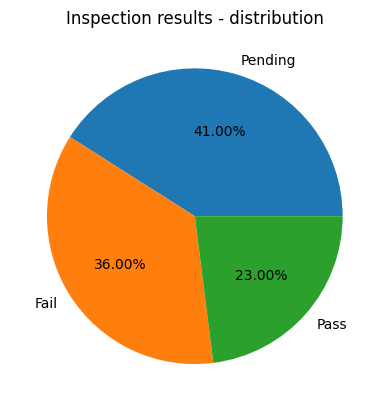

In [156]:
inspection_results_labels=data['Inspection results'].value_counts().index.to_list()


plt.pie(data['Inspection results'].value_counts(), labels=inspection_results_labels, autopct="%.2f%%");
plt.title("Inspection results - distribution");

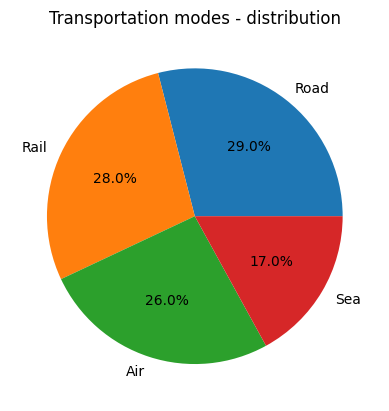

In [157]:
transportation_modes_labels=data['Transportation modes'].value_counts().index.to_list();

plt.pie(data['Transportation modes'].value_counts(), labels=transportation_modes_labels, autopct="%1.1f%%");
plt.title("Transportation modes - distribution");

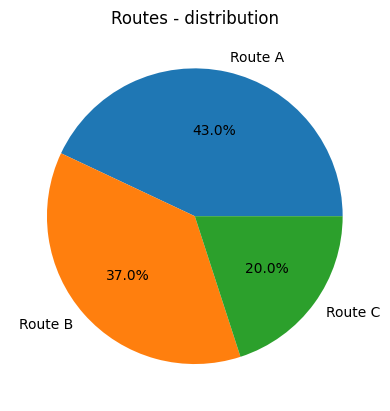

In [158]:
route_labels = data['Routes'].value_counts().index.to_list()


plt.pie(data['Routes'].value_counts(), labels=route_labels, autopct="%1.1f%%");
plt.title("Routes - distribution");

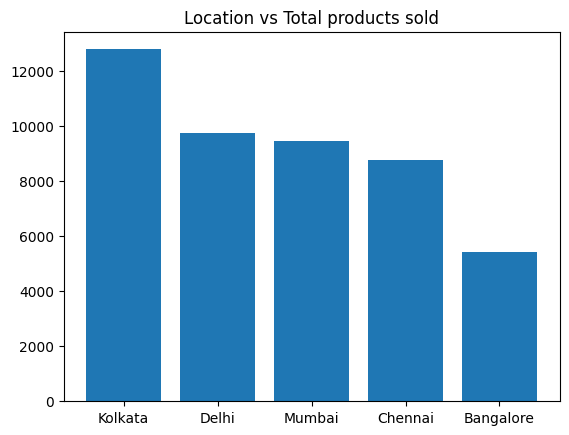

In [159]:

df_loc_product_sell = data[["Location", "Number of products sold"]].copy()


df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()


df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)


df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)


plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts']);
plt.title("Location vs Total products sold");

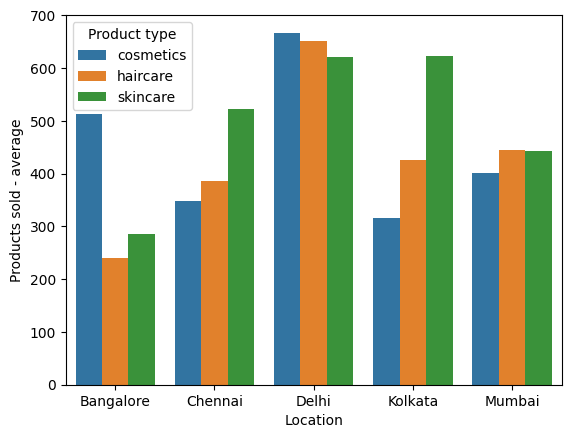

In [160]:

df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()


df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()


df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)


df_product_type_location.reset_index(inplace=True)


sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");
df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()



<ipython-input-161-24b86858005b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

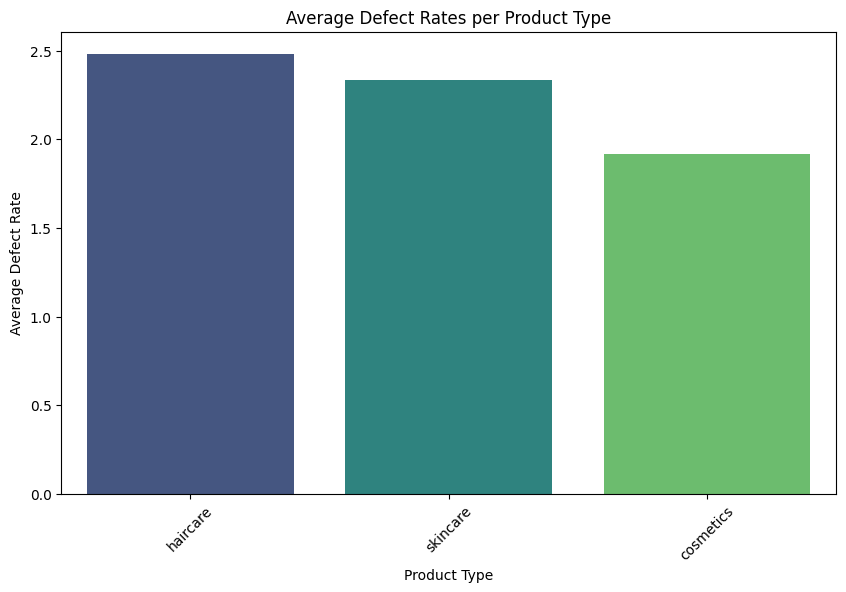

In [161]:

df_product_type_defect = data[['Product type', 'Defect rates']].copy()


df_product_type_defect = df_product_type_defect.groupby('Product type').mean()


df_product_type_defect.rename(columns={'Defect rates': 'Average defect rates'}, inplace=True)

df_product_type_defect.sort_values(by="Average defect rates", ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x=df_product_type_defect.index, y=df_product_type_defect["Average defect rates"], palette="viridis")


plt.title("Average Defect Rates per Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Defect Rate")

plt.xticks(rotation=45)


plt

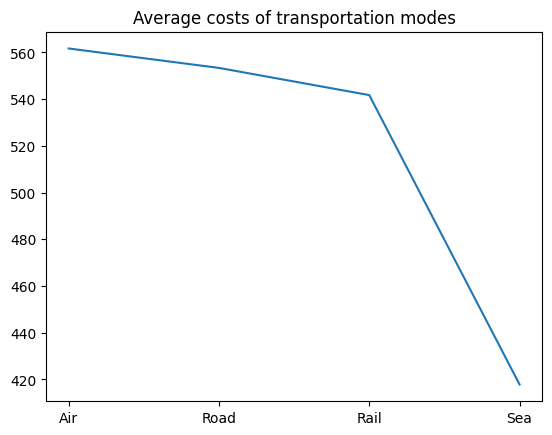

In [162]:

df_transport_cost = data[["Product type", "Transportation modes", "Transportation costs"]].copy()


df_transport_cost = df_transport_cost.groupby('Transportation modes').mean('Costs')


df_transport_cost.rename(columns={"Transportation costs":"Avg Costs"}, inplace=True)


df_transport_cost.sort_values(by="Avg Costs",ascending=False, inplace=True)


plt.plot(df_transport_cost);
plt.title ("Average costs of transportation modes");

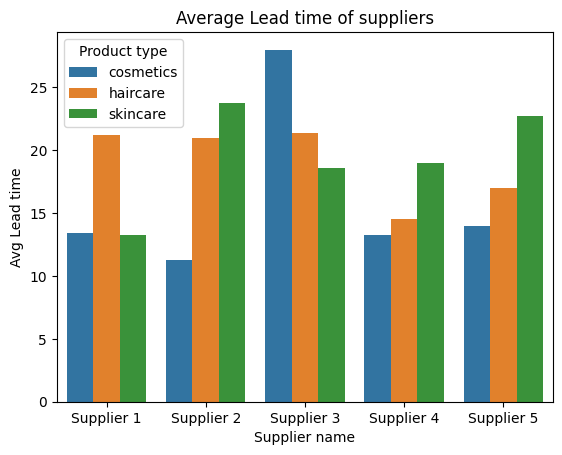

In [163]:

df_supplier_product_type = data[['Product type', 'Supplier name', 'Supplier lead time']].copy()


df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')

df_supplier_product_type.rename(columns={'Supplier lead time':'Avg Lead time'}, inplace=True)

df_supplier_product_type.reset_index(inplace=True);

sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers");

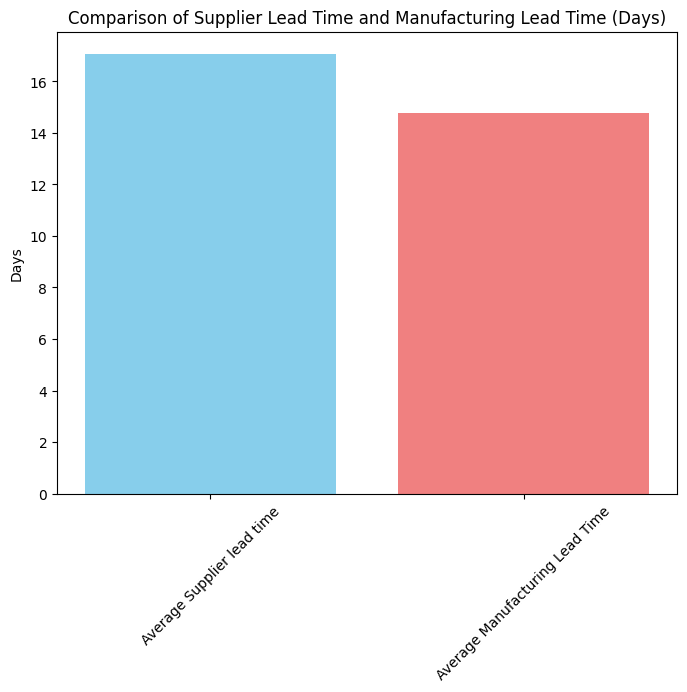

In [164]:

average_lead_time = data['Supplier lead time'].mean()
average_manufacturing_lead_time = data['Manufacturing lead time'].mean()

df = pd.DataFrame({
    'Category': ['Average Supplier lead time', 'Average Manufacturing Lead Time'],
    'Value': [average_lead_time, average_manufacturing_lead_time]
})


plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df['Value'], color=['skyblue', 'lightcoral'])
plt.title('Comparison of Supplier Lead Time and Manufacturing Lead Time (Days)')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.show()

In [165]:
supplier_performance = data.groupby('Supplier name').agg({
    'Supplier lead time': 'mean',
    'Manufacturing lead time': 'mean'
}).reset_index()


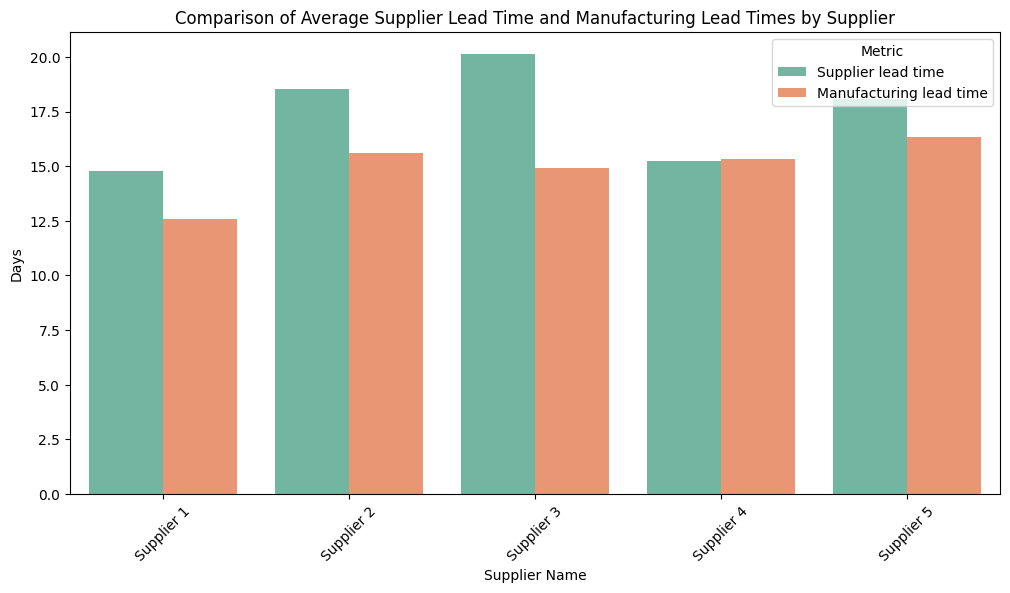

In [166]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Supplier name', y='value', hue='Metric', data=supplier_performance.melt(id_vars='Supplier name', var_name='Metric', value_name='value'), palette='Set2')
plt.title('Comparison of Average Supplier Lead Time and Manufacturing Lead Times by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

In [167]:

risk_assessment = (
    data.groupby("Supplier name", as_index=False).agg(
        Average_Lead_Times=("Supplier lead time", "mean"),
        SD_Lead_Times=("Supplier lead time", "std"),
        Average_Defect_Rate=("Defect rates", "mean"),
        SD_Defect_Rate=("Defect rates", "std"),
        Pass_Rate=("Inspection results", lambda x: (x == "Pass").mean() * 100),
        Fail_Rate=("Inspection results", lambda x: (x == "Fail").mean() * 100),
        Pending_Rate=("Inspection results", lambda x: (x == "Pending").mean() * 100),
    )
)

fig = px.scatter(
    risk_assessment,
    x="Average_Lead_Times",
    y="Average_Defect_Rate",
    size="SD_Lead_Times",
    color="Supplier name",
    error_y="SD_Defect_Rate",
    title="Supplier Risk Assessment",
    labels={
        "Average_Lead_Times": "Average Supplier Lead Time(Day)",
        "Average_Defect_Rate": "Average Defect Rate (%)",
    },
    color_discrete_sequence=px.colors.qualitative.Set2,
)
fig

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

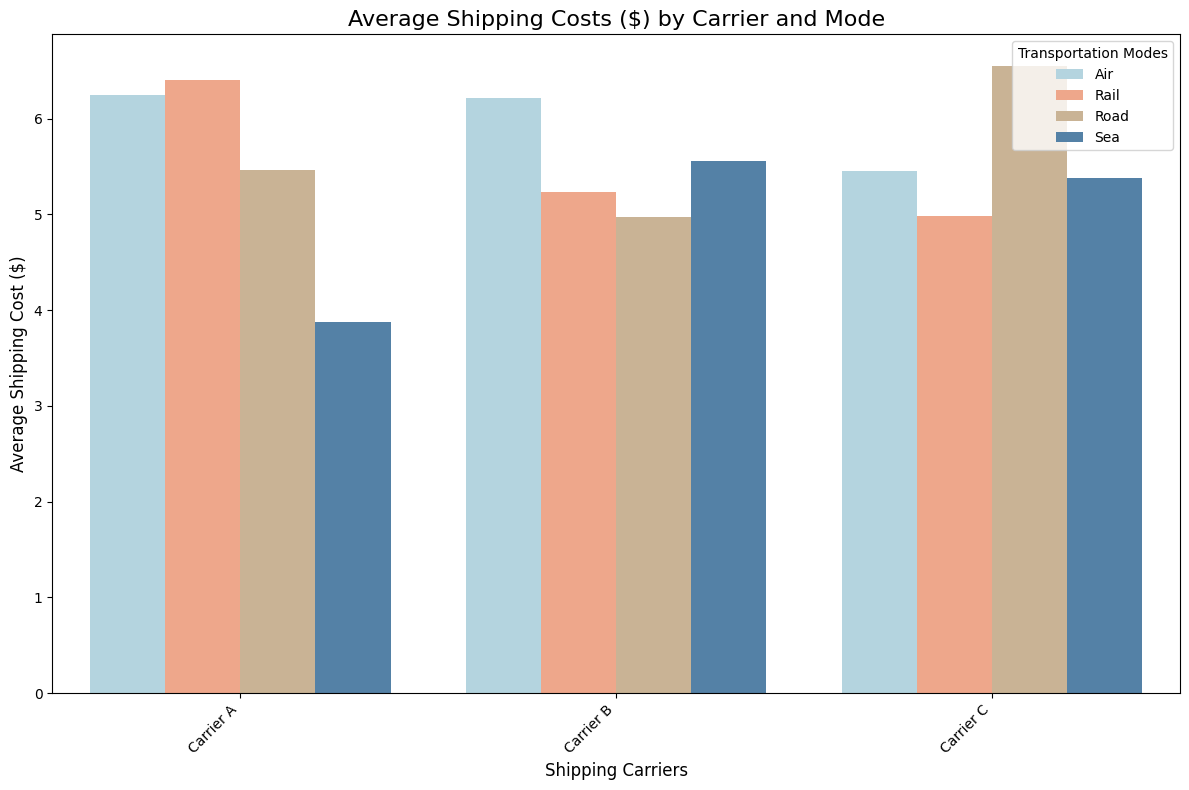

In [168]:

carrier_mode_cost_analysis = (
    data.groupby(["Shipping carriers", "Transportation modes"], as_index=False)
    .agg(Average_Shipping_Cost=("Shipping costs", "mean"))
)


colour_mode = {
    "Air": "lightblue",
    "Rail": "lightsalmon",
    "Road": "tan",
    "Sea": "steelblue",
}

plt.figure(figsize=(12, 8))
sns.barplot(
    data=carrier_mode_cost_analysis,
    x="Shipping carriers",
    y="Average_Shipping_Cost",
    hue="Transportation modes",
    palette=colour_mode,
)


plt.title("Average Shipping Costs ($) by Carrier and Mode", fontsize=16)
plt.xlabel("Shipping Carriers", fontsize=12)
plt.ylabel("Average Shipping Cost ($)", fontsize=12)
plt.legend(title="Transportation Modes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt

In [169]:

mode_route_summary = (
    data.groupby(["Transportation modes", "Routes"], as_index=False)
    .agg(
        Total_Costs=("Transportation costs", "sum"),
        Average_Costs=("Transportation costs", "mean"),
        Count=("Transportation costs", "size"),
    )
)


mode_route_summary

,Transportation modes,Routes,Total_Costs,Average_Costs,Count
0,Air,Route A,5800.887460,527.353405,11
1,Air,Route B,4464.858025,637.836861,7
2,Air,Route C,4338.782012,542.347752,8
3,Rail,Route A,6790.710511,485.050751,14
4,Rail,Route B,7007.410741,637.037340,11
5,Rail,Route C,1370.810306,456.936769,3
6,Road,Route A,5934.412107,539.492010,11
7,Road,Route B,7181.085147,552.391165,13
8,Road,Route C,2932.696386,586.539277,5
9,Sea,Route A,2349.764416,335.680631,7


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

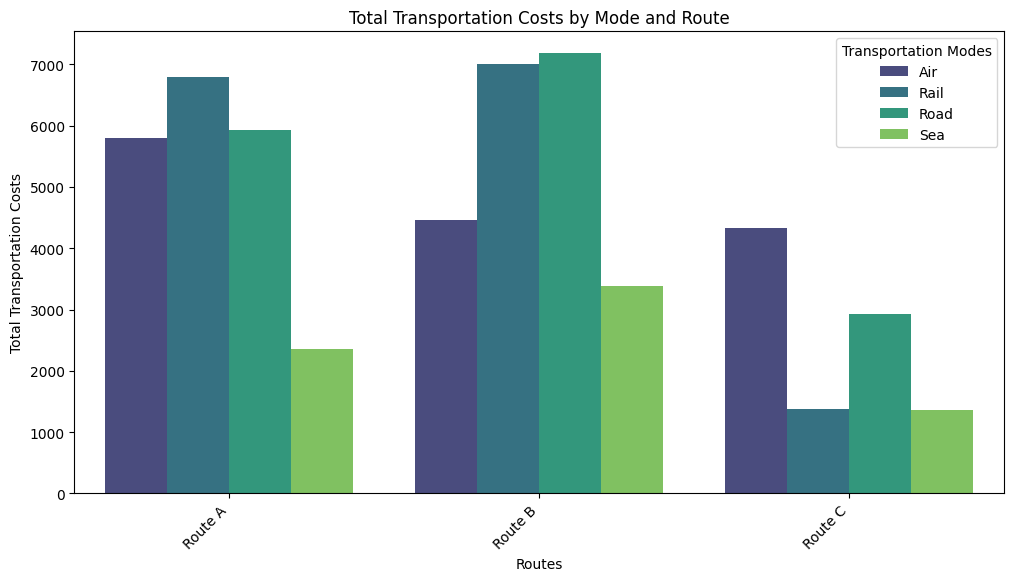

In [170]:





plt.figure(figsize=(12, 6))


sns.barplot(
    data=mode_route_summary,
    x="Routes",
    y="Total_Costs",
    hue="Transportation modes",
    palette="viridis",
)


plt.xticks(rotation=45, ha="right")

plt.xlabel("Routes")
plt.ylabel("Total Transportation Costs")
plt.title("Total Transportation Costs by Mode and Route")


plt.legend(title="Transportation Modes")


plt

In [171]:

efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Transportation costs", "mean"),
        Shipments=("Transportation costs", "size"),  # Count the number of shipments
    )
)


efficiency_analysis["Efficiency_Score"] = (
    efficiency_analysis["Shipments"] / efficiency_analysis["Average_Cost"]
)


print(efficiency_analysis)

    Routes  Average_Cost  Shipments  Efficiency_Score
0  Route A    485.483128         43          0.088572
1  Route B    595.659028         37          0.062116
2  Route C    500.470985         20          0.039962


In [172]:
!pip install pyspc


  Preparing metadata (setup.py) ... done
  Created wheel for pyspc: filename=pyspc-0.4-py3-none-any.whl size=30861 sha256=a5bc7e0192f31f4681ce4c90f87dee60b5c062207902ac38830293b452a5d7f8
  Stored in directory: /root/.cache/pip/wheels/70/ea/cd/abc3ec198b496e3075f470915edf7880325f0c4b5014b80c3b
Successfully built pyspc


In [173]:
from pyspc import spc, xbar_rbar, rbar, rules
import numpy as np
#from scipy import stats
from scipy.stats import norm
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()



In [174]:
#for reference
#df = pd.read_csv('https://raw.githubusercontent.com/MananMishra-7/INSE6210/main/supply_chain_data.csv')
#df.head(10)
#df = df.rename(columns={'Lead times': 'Business lead time', 'Lead time':'Supplier lead time', 'Costs': 'Transportation costs'})
#df.columns

In [175]:
X = pd.read_csv('https://raw.githubusercontent.com/MananMishra-7/INSE6210/main/supply_chain_data.csv')
X.head(10)
X = X.rename(columns={'Lead times': 'Business lead time', 'Lead time':'Supplier lead time', 'Costs': 'Transportation costs'})
X.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Business lead time', 'Order quantities',
       'Shipping times', 'Shipping carriers', 'Shipping costs',
       'Supplier name', 'Location', 'Supplier lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Routes',
       'Transportation costs'],
      dtype='object')

<Axes: ylabel='Defect rates'>

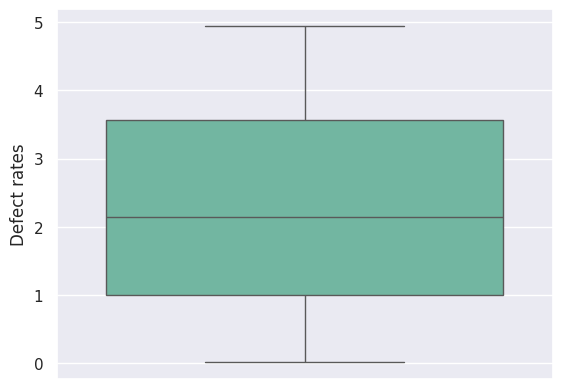

In [176]:

Defect_rates=X['Defect rates']
sns.boxplot(data=Defect_rates, orient="v", palette="Set2")

In [177]:
X = X.drop(columns=['SKU'])
X = X.drop(columns=['Customer demographics'])

In [178]:
X.shape

(100, 22)

In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Stock levels             100 non-null    int64  
 6   Business lead time       100 non-null    int64  
 7   Order quantities         100 non-null    int64  
 8   Shipping times           100 non-null    int64  
 9   Shipping carriers        100 non-null    object 
 10  Shipping costs           100 non-null    float64
 11  Supplier name            100 non-null    object 
 12  Location                 100 non-null    object 
 13  Supplier lead time       100 non-null    int64  
 14  Production volumes       10

In [180]:
X['Product type'] = X['Product type'].apply(lambda x: 0 if x == 'haircare' else (1 if x == 'skincare' else (2 if x == 'cosmetics' else x)))

X['Shipping carriers']=X['Shipping carriers'].apply(lambda x: 0 if x == 'Carrier A' else (1 if x == 'Carrier B' else (2 if x == 'Carrier C' else x)))

X['Supplier name'] = X['Supplier name'].apply(lambda x: 0 if x == 'Supplier1'
                                            else 1 if x == 'Supplier2'
                                            else 2 if x == 'Supplier3'
                                            else 3 if x == 'Supplier4'
                                            else 4 if x == 'Supplier5'
                                            else x)
X['Location'] = X['Location'].apply(lambda x: 0 if x == 'Mumbai'
                                            else 1 if x == 'Banglore'
                                            else 2 if x == 'Chennai'
                                            else 3 if x == 'Delhi'
                                            else 4 if x == 'Kolkata'
                                            else x)
X['Inspection results'] = X['Inspection results'].apply(lambda x: 0 if x == 'Fail'
                                            else 1 if x == 'Pending'
                                            else 2 if x == 'Pass'
                                            else x)
X['Transportation modes'] = X['Inspection results'].apply(lambda x: 0 if x == 'Rail'
                                            else 1 if x == 'Road'
                                            else 2 if x == 'Sea'
                                            else 2 if x == 'Air'
                                            else x)
X['Routes'] = X['Routes'].apply(lambda x: 0 if x == 'Route A'
                                            else 1 if x == 'Route B'
                                            else 2 if x == 'Route C'

                                            else x)
#these are all non ordinal categorical data types

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int64  
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Stock levels             100 non-null    int64  
 6   Business lead time       100 non-null    int64  
 7   Order quantities         100 non-null    int64  
 8   Shipping times           100 non-null    int64  
 9   Shipping carriers        100 non-null    int64  
 10  Shipping costs           100 non-null    float64
 11  Supplier name            100 non-null    object 
 12  Location                 100 non-null    object 
 13  Supplier lead time       100 non-null    int64  
 14  Production volumes       10

In [182]:
X["Supplier name"] = X["Supplier name"].astype("category").cat.codes.astype(float)
X["Location"] = X["Location"].astype("category").cat.codes.astype(float)


In [183]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int64  
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Stock levels             100 non-null    int64  
 6   Business lead time       100 non-null    int64  
 7   Order quantities         100 non-null    int64  
 8   Shipping times           100 non-null    int64  
 9   Shipping carriers        100 non-null    int64  
 10  Shipping costs           100 non-null    float64
 11  Supplier name            100 non-null    float64
 12  Location                 100 non-null    float64
 13  Supplier lead time       100 non-null    int64  
 14  Production volumes       10

In [184]:
X.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Stock levels,Business lead time,Order quantities,Shipping times,Shipping carriers,...,Location,Supplier lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Transportation costs
0,0,69.808006,55,802,8661.996792,58,7,96,4,1,...,0.0,29,215,29,46.279879,1,0.226410,1,1,187.752075
1,1,14.843523,95,736,7460.900065,53,30,37,2,0,...,0.0,23,517,30,33.616769,1,4.854068,1,1,503.065579
2,0,11.319683,34,8,9577.749626,1,10,88,2,1,...,0.0,12,971,27,30.688019,1,4.580593,1,2,141.920282
3,1,61.163343,68,83,7766.836426,23,13,59,6,2,...,3.0,24,937,18,35.624741,0,4.746649,0,0,254.776159
4,1,4.805496,26,871,2686.505152,5,3,56,8,0,...,2.0,5,414,3,92.065161,0,3.145580,0,0,923.440632


In [185]:
from sklearn.preprocessing import MinMaxScaler

# Assume `data` is your DataFrame with numerical columns only
scaler = MinMaxScaler()

# Apply Min-Max scaling to all columns
normalized_data = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the normalized data
normalized_data.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Stock levels,Business lead time,Order quantities,Shipping times,Shipping carriers,...,Location,Supplier lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Transportation costs
0,0.0,0.698749,0.545455,0.803644,0.863204,0.58,0.206897,1.000000,0.333333,0.5,...,0.00,0.965517,0.125993,0.965517,0.459385,0.5,0.042231,0.5,0.5,0.093829
1,0.5,0.134845,0.949495,0.736842,0.726791,0.53,1.000000,0.378947,0.111111,0.0,...,0.00,0.758621,0.468785,1.000000,0.330670,0.5,0.982688,0.5,0.5,0.446727
2,0.0,0.098693,0.333333,0.000000,0.967209,0.01,0.310345,0.915789,0.111111,0.5,...,0.00,0.379310,0.984109,0.896552,0.300901,0.5,0.927111,0.5,1.0,0.042534
3,0.5,0.610060,0.676768,0.075911,0.761537,0.23,0.413793,0.610526,0.555556,1.0,...,0.75,0.793103,0.945516,0.586207,0.351081,0.0,0.960857,0.0,0.0,0.168842
4,0.5,0.031861,0.252525,0.873482,0.184545,0.05,0.068966,0.578947,0.777778,0.0,...,0.50,0.137931,0.351873,0.068966,0.924773,0.0,0.635480,0.0,0.0,0.917210


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

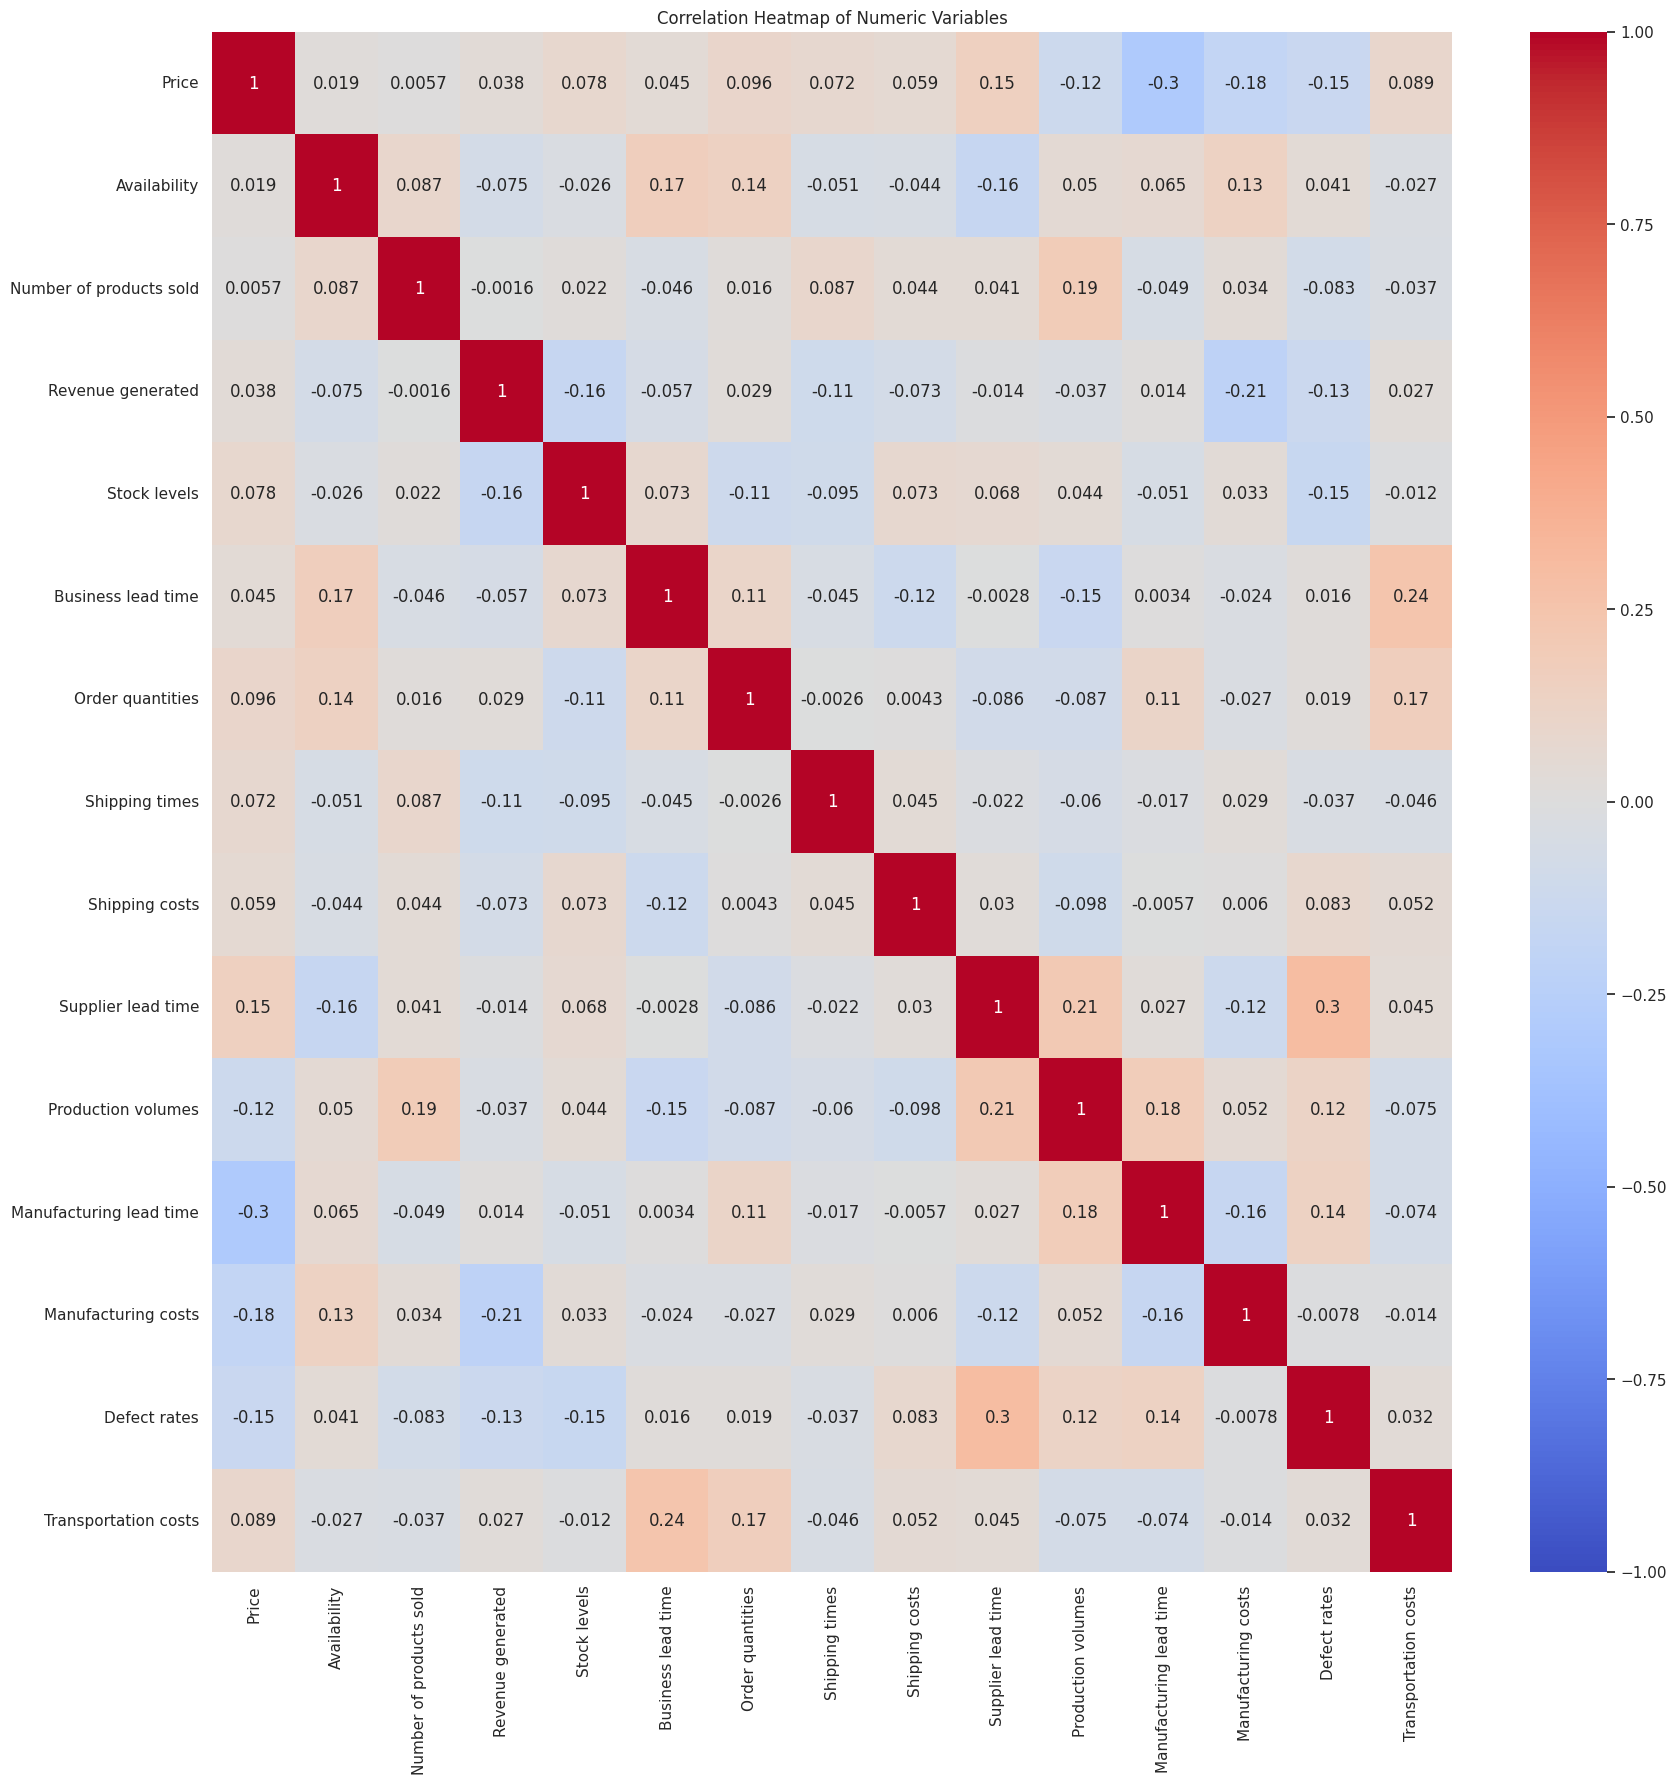

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/MananMishra-7/INSE6210/main/supply_chain_data.csv')

df = df.rename(columns={'Lead times': 'Business lead time', 'Lead time':'Supplier lead time', 'Costs': 'Transportation costs'})

# Set the figure size for all plots
plt.figure(figsize=(20, 20))

# Correlation Heatmap for numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Variables')

# Show the plot
plt.show()


In [188]:
#X is my tranformed data set where categorical data are converted to numerical

In [189]:
#df is my orignal file

In [190]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using LabelEncoder
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



In [191]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int64  
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Stock levels             100 non-null    int64  
 6   Business lead time       100 non-null    int64  
 7   Order quantities         100 non-null    int64  
 8   Shipping times           100 non-null    int64  
 9   Shipping carriers        100 non-null    int64  
 10  Shipping costs           100 non-null    float64
 11  Supplier name            100 non-null    float64
 12  Location                 100 non-null    float64
 13  Supplier lead time       100 non-null    int64  
 14  Production volumes       10

In [192]:
# Define the feature matrix X and target variable y
X = data.drop('Defect rates', axis=1)  # Drop the target variable
y = data['Defect rates']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
top_5_features = feature_importances.head(5)
print(top_5_features)

                    Feature  Importance
15       Supplier lead time    0.200616
17  Manufacturing lead time    0.111878
2                     Price    0.084177
4   Number of products sold    0.061211
16       Production volumes    0.052748


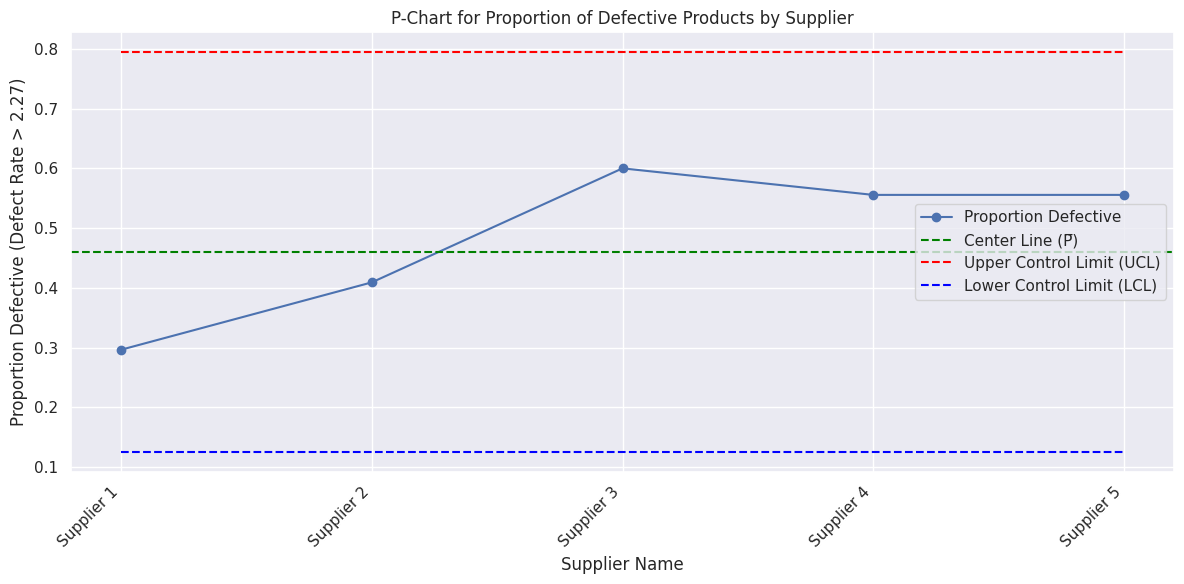

In [193]:
# Define the threshold for "defective" (products with defect rate > 2.27)
threshold = 2.27

# Create a new column indicating if the product is defective (defect rate above the threshold)
df['Defective'] = df['Defect rates'] > threshold

# Group by Supplier name and count the number of defectives and total products
grouped = df.groupby('Supplier name').agg(
    Defective_Count=('Defective', 'sum'),
    Total_Count=('Defective', 'size')
).reset_index()

# Calculate the proportion of defectives for each supplier
grouped['Proportion_Defective'] = grouped['Defective_Count'] / grouped['Total_Count']

# Calculate overall proportion defective (P̅)
P_bar = df['Defective'].mean()  # Equivalent to sum(Defective) / total observations

# Calculate control limits
n = grouped['Total_Count'].mean()  # Average subgroup size
std_error = np.sqrt((P_bar * (1 - P_bar)) / n)
grouped['UCL'] = P_bar + 3 * std_error  # Upper Control Limit
grouped['LCL'] = np.maximum(P_bar - 3 * std_error, 0)  # Lower Control Limit (can't be negative)

# Plot the P-chart
plt.figure(figsize=(12, 6))
plt.plot(grouped['Supplier name'], grouped['Proportion_Defective'], marker='o', linestyle='-', label='Proportion Defective')
plt.axhline(P_bar, color='green', linestyle='--', label='Center Line (P̅)')
plt.plot(grouped['Supplier name'], grouped['UCL'], color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.plot(grouped['Supplier name'], grouped['LCL'], color='blue', linestyle='--', label='Lower Control Limit (LCL)')

# Formatting the plot
plt.title('P-Chart for Proportion of Defective Products by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Proportion Defective (Defect Rate > 2.27)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


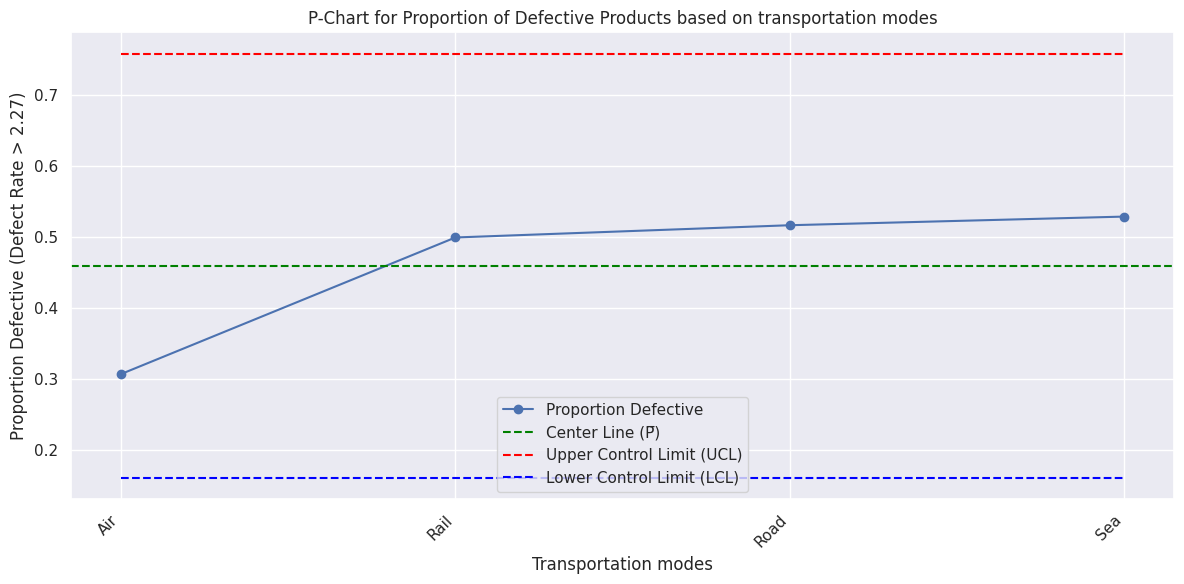

In [194]:
# Define the threshold for "defective" (products with defect rate > 2.27)
threshold = 2.27

# Create a new column indicating if the product is defective (defect rate above the threshold)
df['Defective'] = df['Defect rates'] > threshold

# Group by Transportation modes and count the number of defectives and total products
grouped = df.groupby('Transportation modes').agg(
    Defective_Count=('Defective', 'sum'),
    Total_Count=('Defective', 'size')
).reset_index()

# Calculate the proportion of defectives for each Transportation modes
grouped['Proportion_Defective'] = grouped['Defective_Count'] / grouped['Total_Count']

# Calculate overall proportion defective (P̅)
P_bar = df['Defective'].mean()  # Equivalent to sum(Defective) / total observations

# Calculate control limits
n = grouped['Total_Count'].mean()  # Average subgroup size
std_error = np.sqrt((P_bar * (1 - P_bar)) / n)
grouped['UCL'] = P_bar + 3 * std_error  # Upper Control Limit
grouped['LCL'] = np.maximum(P_bar - 3 * std_error, 0)  # Lower Control Limit (can't be negative)

# Plot the P-chart
plt.figure(figsize=(12, 6))
plt.plot(grouped['Transportation modes'], grouped['Proportion_Defective'], marker='o', linestyle='-', label='Proportion Defective')
plt.axhline(P_bar, color='green', linestyle='--', label='Center Line (P̅)')
plt.plot(grouped['Transportation modes'], grouped['UCL'], color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.plot(grouped['Transportation modes'], grouped['LCL'], color='blue', linestyle='--', label='Lower Control Limit (LCL)')

# Formatting the plot
plt.title('P-Chart for Proportion of Defective Products based on transportation modes')
plt.xlabel('Transportation modes')
plt.ylabel('Proportion Defective (Defect Rate > 2.27)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


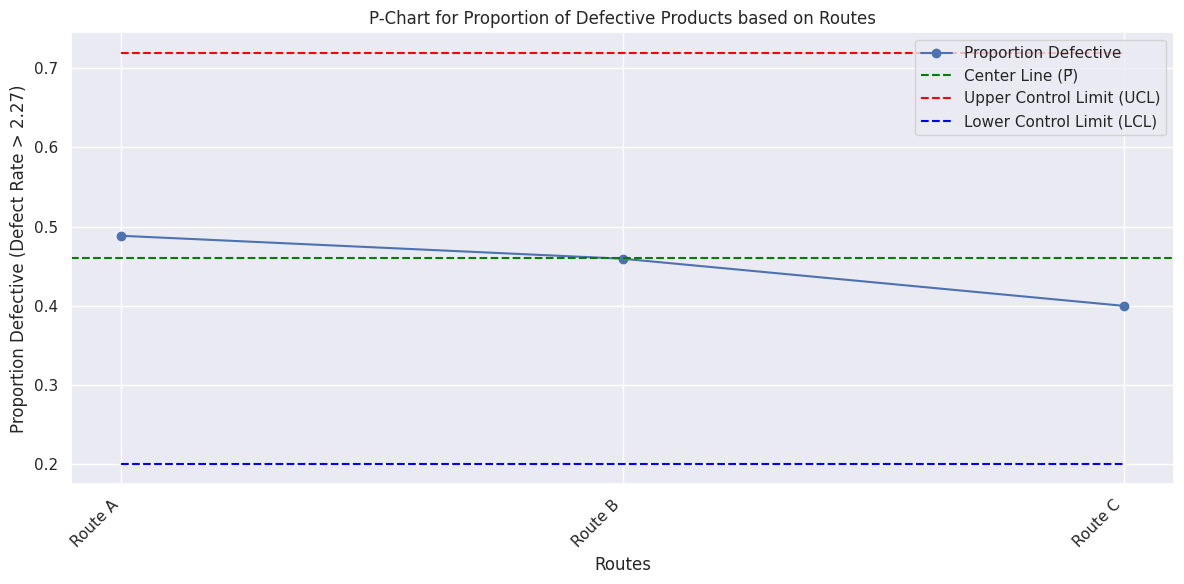

In [195]:
# Define the threshold for "defective" (products with defect rate > 2.27)
threshold = 2.27

# Create a new column indicating if the product is defective (defect rate above the threshold)
df['Defective'] = df['Defect rates'] > threshold

# Group by Routes and count the number of defectives and total products
grouped = df.groupby('Routes').agg(
    Defective_Count=('Defective', 'sum'),
    Total_Count=('Defective', 'size')
).reset_index()

# Calculate the proportion of defectives for each Transportation modes
grouped['Proportion_Defective'] = grouped['Defective_Count'] / grouped['Total_Count']

# Calculate overall proportion defective (P̅)
P_bar = df['Defective'].mean()  # Equivalent to sum(Defective) / total observations

# Calculate control limits
n = grouped['Total_Count'].mean()  # Average subgroup size
std_error = np.sqrt((P_bar * (1 - P_bar)) / n)
grouped['UCL'] = P_bar + 3 * std_error  # Upper Control Limit
grouped['LCL'] = np.maximum(P_bar - 3 * std_error, 0)  # Lower Control Limit (can't be negative)

# Plot the P-chart
plt.figure(figsize=(12, 6))
plt.plot(grouped['Routes'], grouped['Proportion_Defective'], marker='o', linestyle='-', label='Proportion Defective')
plt.axhline(P_bar, color='green', linestyle='--', label='Center Line (P̅)')
plt.plot(grouped['Routes'], grouped['UCL'], color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.plot(grouped['Routes'], grouped['LCL'], color='blue', linestyle='--', label='Lower Control Limit (LCL)')

# Formatting the plot
plt.title('P-Chart for Proportion of Defective Products based on Routes')
plt.xlabel('Routes')
plt.ylabel('Proportion Defective (Defect Rate > 2.27)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


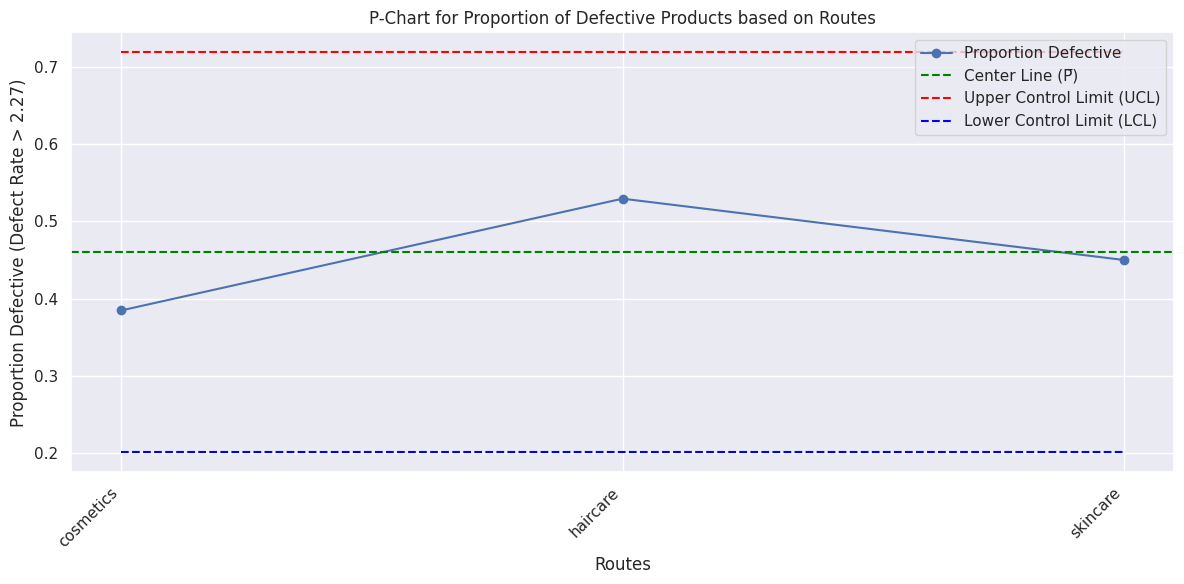

In [196]:
# Define the threshold for "defective" (products with defect rate > 2.27)
threshold = 2.27

# Create a new column indicating if the product is defective (defect rate above the threshold)
df['Defective'] = df['Defect rates'] > threshold

# Group by Routes and count the number of defectives and total products
grouped = df.groupby('Product type').agg(
    Defective_Count=('Defective', 'sum'),
    Total_Count=('Defective', 'size')
).reset_index()

# Calculate the proportion of defectives for each Transportation modes
grouped['Proportion_Defective'] = grouped['Defective_Count'] / grouped['Total_Count']

# Calculate overall proportion defective (P̅)
P_bar = df['Defective'].mean()  # Equivalent to sum(Defective) / total observations

# Calculate control limits
n = grouped['Total_Count'].mean()  # Average subgroup size
std_error = np.sqrt((P_bar * (1 - P_bar)) / n)
grouped['UCL'] = P_bar + 3 * std_error  # Upper Control Limit
grouped['LCL'] = np.maximum(P_bar - 3 * std_error, 0)  # Lower Control Limit (can't be negative)

# Plot the P-chart
plt.figure(figsize=(12, 6))
plt.plot(grouped['Product type'], grouped['Proportion_Defective'], marker='o', linestyle='-', label='Proportion Defective')
plt.axhline(P_bar, color='green', linestyle='--', label='Center Line (P̅)')
plt.plot(grouped['Product type'], grouped['UCL'], color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.plot(grouped['Product type'], grouped['LCL'], color='blue', linestyle='--', label='Lower Control Limit (LCL)')

# Formatting the plot
plt.title('P-Chart for Proportion of Defective Products based on Routes')
plt.xlabel('Routes')
plt.ylabel('Proportion Defective (Defect Rate > 2.27)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


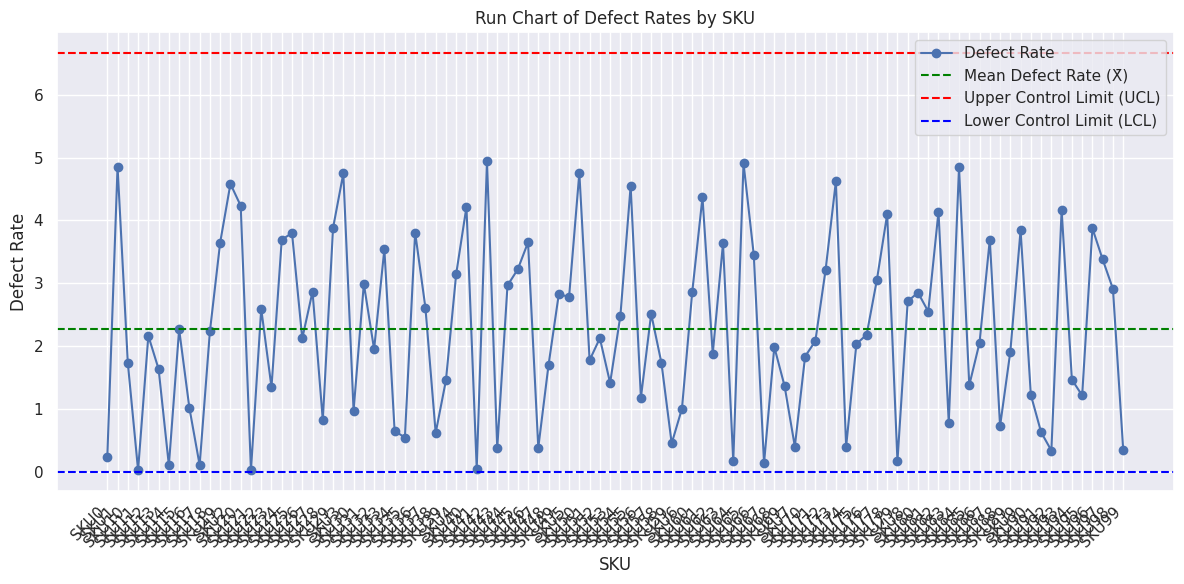

In [197]:
# Set threshold if needed
threshold = 2.27

# Calculate basic stats for Defect Rates
mean_defect_rate = df['Defect rates'].mean()
std_dev = df['Defect rates'].std()

# Define control limits
UCL = mean_defect_rate + 3 * std_dev
LCL = max(mean_defect_rate - 3 * std_dev, 0)  # LCL can't be negative

# Sort by SKU for consistent plotting (optional)
df_sorted = df.sort_values('SKU')

# Plot the run chart
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['SKU'], df_sorted['Defect rates'], marker='o', linestyle='-', label='Defect Rate')
plt.axhline(mean_defect_rate, color='green', linestyle='--', label='Mean Defect Rate (X̄)')
plt.axhline(UCL, color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(LCL, color='blue', linestyle='--', label='Lower Control Limit (LCL)')

# Formatting
plt.title('Run Chart of Defect Rates by SKU')
plt.xlabel('SKU')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

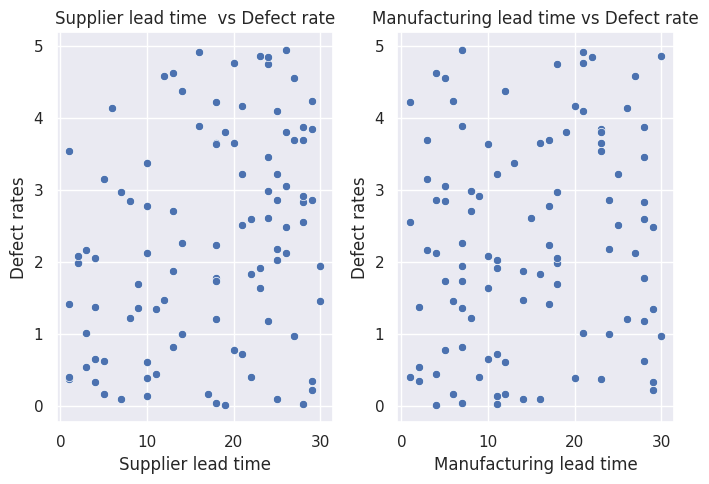

In [198]:
# Scatter plots for continuous variables against defect rates
fig, axes = plt.subplots(1, 2, figsize=(7, 5))


sns.scatterplot(ax=axes[0], x='Supplier lead time', y='Defect rates', data=data)
axes[0].set_title('Supplier lead time  vs Defect rate')

sns.scatterplot(ax=axes[1], x='Manufacturing lead time', y='Defect rates', data=data)
axes[1].set_title('Manufacturing lead time vs Defect rate')

plt.tight_layout()
plt.show()


In [199]:
!pip install seaborn matplotlib pandas

In [200]:
print(data.columns[data.columns.duplicated()])

Index([], dtype='object')


In [201]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np










# Display the top 5 most important features
top_5_features = feature_importances.head(5)
print("Top 5 factors affecting Defect Rate:")
print(top_5_features)


target_defect_rate = 1.00

# Get current predictions on the test set
y_pred = model.predict(X_test)

# Calculate the difference from the target
reduction_needed = y_pred - target_defect_rate

recommendations = []

for feature in top_5_features['Feature']:
    avg_current_value = np.mean(X_test[feature])  # Current average in test data
    avg_train_value = np.mean(X_train[feature])   # Training average for comparison

    if avg_current_value > avg_train_value:
        recommendations.append(f"Reduce {feature}: Current average is {avg_current_value:.2f}")
    else:
        recommendations.append(f"Optimize {feature}: Consider better control over {feature}")

# If no specific improvements are found, give a general suggestion
if len(recommendations) == 0:
    recommendations.append("Maintain optimized processes and quality control.")

# Display recommendations
print("\nRecommendations to reduce defect rate to 1.0:")
for rec in recommendations:
    print(rec)


Top 5 factors affecting Defect Rate:
                    Feature  Importance
15       Supplier lead time    0.200616
17  Manufacturing lead time    0.111878
2                     Price    0.084177
4   Number of products sold    0.061211
16       Production volumes    0.052748

Recommendations to reduce defect rate to 1.0:
Reduce Supplier lead time: Current average is 18.37
Optimize Manufacturing lead time: Consider better control over Manufacturing lead time
Reduce Price: Current average is 52.21
Reduce Number of products sold: Current average is 516.13
Reduce Production volumes: Current average is 591.03


In [202]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/MananMishra-7/INSE6210/main/supply_chain_data.csv') # Adjust this if dataset is loaded differently






In [203]:
data = data.rename(columns={'Lead times': 'Business lead time', 'Lead time':'Supplier lead time', 'Costs': 'Transportation costs'})


In [204]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [205]:
# Convert categorical columns to numerical using LabelEncoder
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int64  
 1   SKU                      100 non-null    int64  
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    int64  
 7   Stock levels             100 non-null    int64  
 8   Business lead time       100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    int64  
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    int64  
 14  Location                 10

In [207]:

X = data.drop('Defect rates', axis=1)
y = data['Defect rates']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [208]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Get the top 10 most important features
top_10_features = feature_importances.head(10)
print("##### Top 10 features affecting Exam Score: #####")
print(top_10_features)

##### Top 10 features affecting Exam Score: #####
                    Feature  Importance
15       Supplier lead time    0.200616
17  Manufacturing lead time    0.111878
2                     Price    0.084177
4   Number of products sold    0.061211
16       Production volumes    0.052748
8        Business lead time    0.049184
22     Transportation costs    0.049022
12           Shipping costs    0.045859
7              Stock levels    0.037941
18      Manufacturing costs    0.037939
